In [40]:
import pandas as pd;
import numpy as np;
import json;
# a = pd.read_json('keystrokes-34c38-export (2).json')

In [41]:
# json.loads(open('keystrokes-34c38-export (1).json').readlines())
rawJSON = json.loads("".join(open('keystrokes-34c38-export (4).json').readlines()))

In [42]:
keystrokes=pd.DataFrame.from_dict(rawJSON)
obj = (keystrokes[:1]['samples'])
keystrokes=pd.DataFrame.from_dict(rawJSON['samples']).T

In [43]:
keystrokes

,keystrokes,subject
-KVbkycA8sWfeS5yXEe3,"[[""1478135878083 Shift PRESSED"",""1478135878195...",Joseph Haaga
-KVblIpvWU-VNivjTQzR,"[[""1478135954956 Shift PRESSED"",""1478135955211...",Andrew Sutardji
-KVbnHZpYAW-8tdtmh9X,"[[""1478136483035 Shift PRESSED"",""1478136483124...",Joseph Haaga
-KVbnkYCYNTzNO1a5VK_,"[[""1478136603116 Shift PRESSED"",""1478136603213...",Joseph Haaga
-KVbp0rwVrUiIIGaycmW,"[[""1478136939933 Shift PRESSED"",""1478136940044...",Joseph Haaga
-KVbpFpFBbzcUg1it00x,"[[""1478137001019 Shift PRESSED"",""1478137001131...",Joseph Haaga
-KVbpQT6F9G8erQwRusp,"[[""1478137047346 undefined RELEASED"",""14781370...",Joseph Haaga
-KVd0eAZy5YHyUlnzhnf,"[[""1478157025688 Shift PRESSED"",""1478157025807...",Sean Murphy
-KVfF3_zM6uVQTVFzcYZ,"[[""1478194338378 Shift PRESSED"",""1478194338490...",Justin Golt
-KVfF5BZeMtIsdfAJPw3,"[[""1478194359318 Shift PRESSED"",""1478194359500...",Dr. Michael Dulik


In [44]:
keystrokes.subject.unique().tolist()
# 12 unique subjects

['Joseph Haaga',
 'Andrew Sutardji',
 'Sean Murphy',
 'Justin Golt',
 'Dr. Michael Dulik',
 'Matthew Lee Keith',
 'Rachel Semenov',
 'Ashley Sudney',
 'Eric Roden',
 'Andrew Speight',
 'Scott Oppenheim',
 'Esther Nardone']

## List of features to calculate
  - Dwell times per key (29 features)
  - Flight time

In [45]:
# analyze single subject
recording = keystrokes[:1]['keystrokes'][0]
list_of_recordings = json.loads(recording)
list_of_recordings[0]
split_list = []

# into DataFrame
raw = pd.DataFrame(list_of_recordings[0])
for n in raw.index:
    split_list.append(raw[0][n].split(" "));
split = pd.DataFrame(split_list,columns=['timestamp','key','action'])

In [46]:
def calculatePerKeyDwellTime(dataframe):
    dwell_times = {}
    for i in set(dataframe.key.unique()):
        running_average = 0;
        subset = dataframe[dataframe['key'] == i];
        if(len(dataframe[dataframe['key']==i])%2==0):
            for g in range(len(subset)-1):
                running_average+=(float(subset.iloc[g+1]['timestamp']) - float(subset.iloc[g]['timestamp']));
            running_average/=len(subset);
        else: # last key release not recorded
            for g in range(len(subset)-2):
                running_average+=(float(subset.iloc[g+1]['timestamp']) - float(subset.iloc[g]['timestamp']));
            running_average/=len(subset);
        dwell_times[i] = running_average;
    return dwell_times;    
        

In [47]:
dts = calculatePerKeyDwellTime(split);

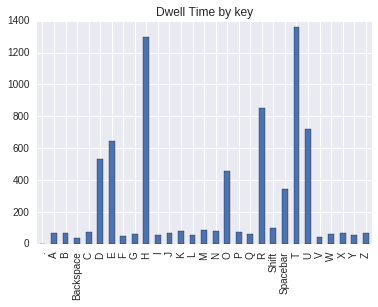

In [48]:
import matplotlib
%matplotlib inline
import seaborn;
pd.Series(dts).plot(kind='bar', title='Dwell Time by key', y='time (ms)')


In [49]:
def calculateFlightTime(dataframe):
#     time between release and next key press
    flight_times = [];
    index_of_releases = ((dataframe[dataframe['action']=='RELEASED']).index.tolist());
    range_of_events = list(range(index_of_releases[0], index_of_releases[-1]));
    index_of_presses = list(set(range_of_events).difference(index_of_releases));
#     print (index_of_presses);
#     print ("# presses: "+str(len(index_of_presses)));
#     print (index_of_releases);
#     print ("# releases: "+str(len(index_of_releases)));
#     drop any releases before the first press
    first_press = index_of_presses[0];
    while (index_of_presses[0]<index_of_releases[0]):
        del index_of_releases[0];
#     for j in range(min(len(index_of_releases),len(index_of_presses))):
    while(len(index_of_presses)>0):
        flight_times.append((float(dataframe['timestamp'].iloc[index_of_presses[0]]) - float(dataframe['timestamp'].iloc[index_of_releases[0]])));
#         fix
        del index_of_releases[0]
        del index_of_presses[0]
    
    return flight_times;

In [50]:
a = calculateFlightTime(split);

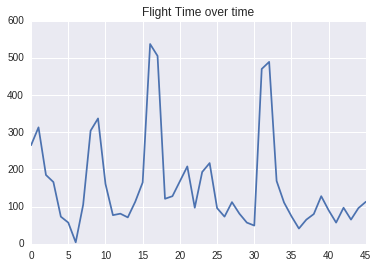

In [51]:
pd.Series(a).plot(title='Flight Time over time')

In [52]:
# Average Flight time
np.average(pd.Series(a))

157.91304347826087

In [53]:
# Max Flight time
np.max(pd.Series(a))

537.0

In [54]:
# Min Flight time
np.min(pd.Series(a))

4.0

In [55]:
model_data = {};
indexNumber = 0;
for j in range(len(keystrokes)):
    recording = keystrokes['keystrokes'].iloc[j];
    list_of_recordings = json.loads(recording)
    for k in list_of_recordings:
        for n in raw.index:
            split_list.append(raw[0][n].split(" "));
        temp = pd.DataFrame(split_list,columns=['timestamp','key','action'])
        dts = calculatePerKeyDwellTime(temp);
#         fts = calculateFlightTime(temp);
#         dts['averageFlightTime'] = np.average(fts);
        dts['subject'] = keystrokes['subject'].iloc[j];
        model_data[indexNumber]=dts;
        indexNumber+=1;


In [56]:
# input_data = pd.DataFrame(model_data).T.drop(['undefined'],axis=1).dropna(axis=1)
input_data = pd.DataFrame(model_data).T

In [57]:
joe = input_data[input_data['subject']=="Joseph Haaga"]

In [58]:
# training_data = input_data.drop(['-KVbpFpFBbzcUg1it00x','-KVbp0rwVrUiIIGaycmW','-KVbnkYCYNTzNO1a5VK_','-KVbnHZpYAW-8tdtmh9X','-KVbpQT6F9G8erQwRusp'])
training_data = input_data

In [59]:
# drop all but one of my trials from training set
training_data=training_data.drop(range(6,21))

In [60]:
# drop training instance from my trials (answer key)
joe = joe.drop([0,1,2])

In [61]:
training_labels = training_data['subject']
training_data = training_data.drop(['subject'],axis=1)

In [62]:
# pd.get_dummies(training_labels)

In [63]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='random')
clf = clf.fit(training_data, training_labels)

In [64]:
joe.drop(['subject'],axis=1)

,.,A,B,Backspace,C,D,E,F,G,H,...,R,Shift,Spacebar,T,U,V,W,X,Y,Z
6,0,8.4375,8.6875,4.4375,9.0625,66.9688,80.6094,5.9375,7.5625,161.969,...,106.469,12.4375,43.4219,169.719,90.2188,5.125,7.4375,8.5,6.9375,8.4375
7,0,7.5,7.72222,3.94444,8.05556,59.5278,71.6528,5.27778,6.72222,143.972,...,94.6389,11.0556,38.5972,150.861,80.1944,4.55556,6.61111,7.55556,6.16667,7.5
8,0,6.75,6.95,3.55,7.25,53.575,64.4875,4.75,6.05,129.575,...,85.175,9.95,34.7375,135.775,72.175,4.1,5.95,6.8,5.55,6.75
9,0,6.13636,6.31818,3.22727,6.59091,48.7045,58.625,4.31818,5.5,117.795,...,77.4318,9.04545,31.5795,123.432,65.6136,3.72727,5.40909,6.18182,5.04545,6.13636
10,0,5.625,5.79167,2.95833,6.04167,44.6458,53.7396,3.95833,5.04167,107.979,...,70.9792,8.29167,28.9479,113.146,60.1458,3.41667,4.95833,5.66667,4.625,5.625
11,0,5.19231,5.34615,2.73077,5.57692,41.2115,49.6058,3.65385,4.65385,99.6731,...,65.5192,7.65385,26.7212,104.442,55.5192,3.15385,4.57692,5.23077,4.26923,5.19231
12,0,4.82143,4.96429,2.53571,5.17857,38.2679,46.0625,3.39286,4.32143,92.5536,...,60.8393,7.10714,24.8125,96.9821,51.5536,2.92857,4.25,4.85714,3.96429,4.82143
13,0,4.5,4.63333,2.36667,4.83333,35.7167,42.9917,3.16667,4.03333,86.3833,...,56.7833,6.63333,23.1583,90.5167,48.1167,2.73333,3.96667,4.53333,3.7,4.5
14,0,4.21875,4.34375,2.21875,4.53125,33.4844,40.3047,2.96875,3.78125,80.9844,...,53.2344,6.21875,21.7109,84.8594,45.1094,2.5625,3.71875,4.25,3.46875,4.21875
15,0,3.97059,4.08824,2.08824,4.26471,31.5147,37.9338,2.79412,3.55882,76.2206,...,50.1029,5.85294,20.4338,79.8676,42.4559,2.41176,3.5,4,3.26471,3.97059


In [65]:
clf.predict(joe.drop(['subject'],axis=1))

array(['Andrew Sutardji', 'Andrew Sutardji', 'Andrew Sutardji',
       'Sean Murphy', 'Sean Murphy', 'Sean Murphy', 'Sean Murphy',
       'Sean Murphy', 'Sean Murphy', 'Sean Murphy', 'Sean Murphy',
       'Sean Murphy', 'Sean Murphy', 'Sean Murphy', 'Sean Murphy'], dtype=object)

In [66]:
clf.predict_proba(joe.drop(['subject'],axis=1))

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  

In [67]:
clf.tree_

In [68]:
from sklearn import tree;
tree.export_graphviz(clf, out_file='tree.dot')                

In [69]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(training_data, training_labels)                         
MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

ImportError: cannot import name 'MLPClassifier'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(training_data, training_labels) 
neigh.predict(joe.drop(['subject'],axis=1))

In [ ]:
neigh.predict_proba(joe.drop(['subject'],axis=1))

In [ ]:
# Lets try binary classification
binary_input = input_data[:6]
binary_input

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(binary_input.drop(['subject'],axis=1), binary_input['subject']) 
neigh.predict(joe.drop(['subject'],axis=1))

In [ ]:
joe